<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/WithinGroup_EnvironmentalFactors_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded = files.upload() #choose file dados_relativizados_carcinicultura.csv



Saving dados_relativizados_carcinicultura.csv to dados_relativizados_carcinicultura.csv


In [13]:
#Upload data from cvs file
df = pd.read_csv(io.StringIO(uploaded['dados_relativizados_carcinicultura.csv'].decode('utf-8'))) 
df.shape
print(df)

           cultura                                 especie  ...  S19_IR      S20_IE
0   Carcinicultura        M. rosenbergii - Espirito Santo-  ...   76.00   87.098530
1   Carcinicultura  P. vannamei - Sergipe - Semi intensivo  ...   11.48   94.647070
2   Carcinicultura                  L. vannamei - Aquafort  ...   76.94   77.426964
3   Carcinicultura                  L. vannamei - Northern  ...   79.96   84.866630
4   Carcinicultura                L. vannamei - Aquacrusta  ...   77.15   84.812194
5   Carcinicultura                        L. vannamei - HM  ...   81.63   84.866630
6   Carcinicultura                      L. vannamei - Ilha  ...   77.81   96.878969
7   Carcinicultura                   L. vannamei - Carpixe  ...   71.63   82.398839
8   Carcinicultura                   L. vannamei - Marinus  ...   68.01   81.745600
9   Carcinicultura              L. vannamei - Aquabrasilis  ...   71.63  100.000000
10  Carcinicultura  L. vannamei - Aquarium - baixa densid.  ...  100.00   90

In [14]:
df.shape
column_names = df.columns
#Select fatores Ambientais 
feature_names = [name for name in column_names if name.startswith("A")] 

#feature_names = list(df.columns["A2_DA":"A4_EUC"])
#print(feature_names)
list_names = ['especie'] + feature_names
df_environment = df[list_names]
#df_environment.head()



In [15]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_environment.iloc[:,1:].values
#x = StandardScaler().fit_transform(x) # normalizing the features
print(x)


[[3.22735164e+00 4.55664640e-02 6.42199138e+01 7.78761062e+01
  1.00000000e+02 7.31587195e+01 9.19435594e+01 5.36666667e+01
  6.98857143e+01 2.00000000e+01 2.11111111e+01 1.00000000e+02
  9.13891935e+01 8.53664012e+01 8.05882089e+01 0.00000000e+00]
 [1.03394824e+01 8.43327720e-02 8.15455451e+01 3.27002477e+01
  4.23180231e+01 1.00000000e+02 1.00000000e+02 5.81752484e+01
  8.76702509e+01 1.81818182e+01 2.00000000e+01 8.00000000e+01
  7.20257235e+01 6.54320988e+01 6.25579240e+01 1.00000000e+02]
 [1.07344157e+01 7.24543930e-02 8.86019470e+01 3.69920598e+01
  2.63765780e+01 8.28744124e+01 7.96085571e+01 2.22145567e+01
  3.77585675e+01 8.69565217e+00 6.36515913e+00 1.00000000e+02
  9.21649304e+01 9.30550137e+01 8.75486381e+01 8.46264886e+01]
 [1.15876050e+01 6.80832030e-02 7.94110519e+01 3.20907617e+01
  2.27773301e+01 7.40094023e+01 6.19936277e+01 1.74904943e+01
  1.43519333e+01 1.73913043e+01 3.55140187e+01 1.00000000e+02
  1.00000000e+02 8.43352192e+01 1.00000000e+02 7.88523999e+01]
 [1.

In [16]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_environment[['especie']]], axis = 1)

['M. rosenbergii - Espirito Santo-'
 'P. vannamei - Sergipe - Semi intensivo' 'L. vannamei - Aquafort'
 'L. vannamei - Northern' 'L. vannamei - Aquacrusta' 'L. vannamei - HM'
 'L. vannamei - Ilha' 'L. vannamei - Carpixe' 'L. vannamei - Marinus'
 'L. vannamei - Aquabrasilis' 'L. vannamei - Aquarium - baixa densid.'
 'L. vannamei - Aquarium - alta densis'
 'L. vannamei - Aquarium-  bifasico']


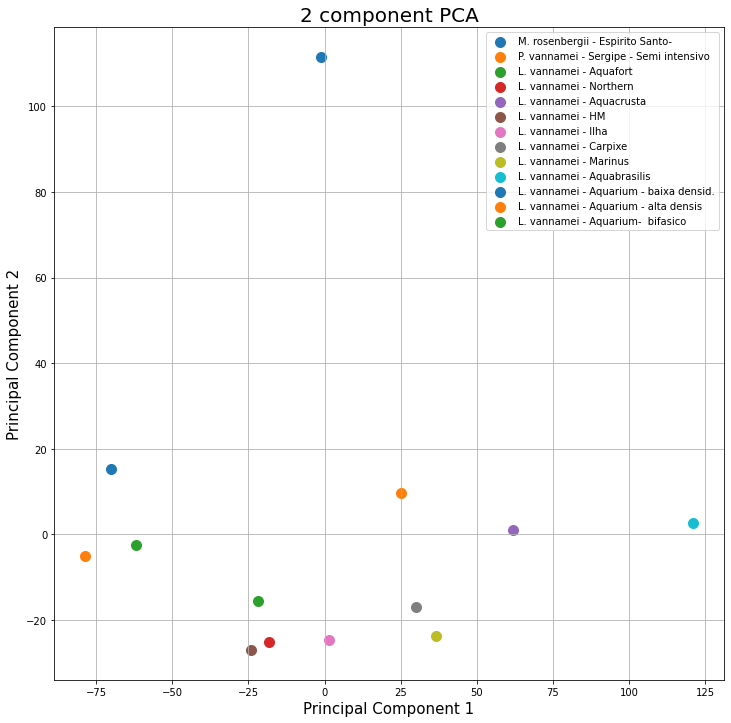

In [17]:
#Visualize results of PCA
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_environment['especie'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = finalDf['especie'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100)
ax.legend(targets)
ax.grid()

In [12]:
print(pca.singular_values_)

[8.41238866 6.4835025 ]


In [ ]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.34023213 0.20209521]
total variance explained: 0.5423273442348485
